# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# OpenWeatherMap API Key
from api_keys import weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Marsala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=marsala
Processing Record 2 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=hobart
Processing Record 3 | Takefu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=takefu
Processing Record 4 | Abu Zabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=abu zabad
City not found. Skipping...
Processing Record 5 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=vestmannaeyjar
Processing Record 6 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=saint-augustin
Processing Record 7 | Upernavik
http://ap

Processing Record 57 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=bilibino
Processing Record 58 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=ahipara
Processing Record 59 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=namibe
Processing Record 60 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=castro
Processing Record 61 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=saint-philippe
Processing Record 62 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=new norfolk
Processing Record 63 | Skegness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c

Processing Record 113 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=butaritari
Processing Record 114 | Port Hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=port hawkesbury
Processing Record 115 | Birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=birjand
Processing Record 116 | Sawai Madhopur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=sawai madhopur
City not found. Skipping...
Processing Record 117 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=yellowknife
Processing Record 118 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=leningradskiy
Processing Record 119 | Pevek
http://api.openweathermap.or

Processing Record 169 | Chiang Khong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=chiang khong
Processing Record 170 | Chuncheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=chuncheng
Processing Record 171 | Sibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=sibu
Processing Record 172 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=yerbogachen
Processing Record 173 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=bathsheba
Processing Record 174 | Henderson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=henderson
Processing Record 175 | Windsor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711

City not found. Skipping...
Processing Record 225 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=pitimbu
Processing Record 226 | Guadix
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=guadix
Processing Record 227 | Floriano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=floriano
Processing Record 228 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=port hardy
Processing Record 229 | Mazyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=mazyr
Processing Record 230 | Singaraja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=singaraja
Processing Record 231 | Lebanon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4

Processing Record 280 | Grafton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=grafton
City not found. Skipping...
Processing Record 281 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=mogadishu
Processing Record 282 | Teya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=teya
Processing Record 283 | Crowley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=crowley
Processing Record 284 | Shiroishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=shiroishi
Processing Record 285 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=srednekolymsk
Processing Record 286 | Leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

City not found. Skipping...
Processing Record 336 | Illapel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=illapel
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 337 | Gillette
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=gillette
Processing Record 338 | Margasari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=margasari
Processing Record 339 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=flinders
Processing Record 340 | Grand-Lahou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=grand-lahou
Processing Record 341 | Palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=palana
Processing Recor

Processing Record 391 | Nagato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=nagato
Processing Record 392 | Nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=nhulunbuy
Processing Record 393 | Uarini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=uarini
Processing Record 394 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=byron bay
Processing Record 395 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=longyearbyen
Processing Record 396 | Koshurnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=koshurnikovo
Processing Record 397 | Pacifica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc871

Processing Record 446 | Delesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=delesti
City not found. Skipping...
City not found. Skipping...
Processing Record 447 | Smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=smithers
Processing Record 448 | Nizwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=nizwa
City not found. Skipping...
Processing Record 449 | Hauterive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=hauterive
City not found. Skipping...
Processing Record 450 | Luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=luganville
Processing Record 451 | Barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=barguzin
Processing Record 45

Processing Record 501 | Sweetwater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=sweetwater
Processing Record 502 | Granada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=granada
Processing Record 503 | Doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=doha
Processing Record 504 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=goderich
Processing Record 505 | Polunochnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=polunochnoye
City not found. Skipping...
Processing Record 506 | Coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=coahuayana
Processing Record 507 | Kasempa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 557 | Bolnisi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=bolnisi
Processing Record 558 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=faanui
Processing Record 559 | Tumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=tumba
City not found. Skipping...
Processing Record 560 | Waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=waddan
Processing Record 561 | Iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=iskateley
Processing Record 562 | Ust-Maya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd4508ecc8711d7ae05410c5cd0&q=ust-maya
Processing Record 563 | Warner Robins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e94ecd450

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Marsala,40,IT,1570334092,78,37.80,12.44,71.60,14.99
1,Hobart,75,AU,1570333914,82,-42.88,147.33,62.01,13.87
2,Takefu,75,JP,1570334094,64,35.90,136.17,69.80,12.75
3,Abu Zabad,100,SD,1570334096,79,12.35,29.25,73.01,7.96
4,Vestmannaeyjar,66,IS,1570334097,86,63.44,-20.27,50.10,18.34


In [57]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Marsala,40,IT,1570334092,78,37.80,12.44,71.60,14.99
1,Hobart,75,AU,1570333914,82,-42.88,147.33,62.01,13.87
2,Takefu,75,JP,1570334094,64,35.90,136.17,69.80,12.75
3,Abu Zabad,100,SD,1570334096,79,12.35,29.25,73.01,7.96
4,Vestmannaeyjar,66,IS,1570334097,86,63.44,-20.27,50.10,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

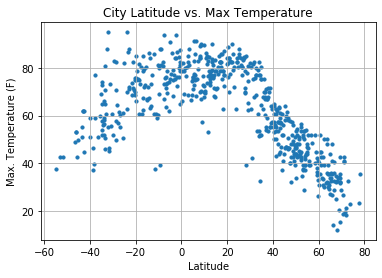

In [58]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

The above scatter plot shows a bell shaped movement, which indicates a direction change between the Northern and the Southern hemisphere. In the Southern emisphere there is a positive relationship between the 2 variables while in the Northern emisphere it is a negative relationship.

#### Latitude vs. Humidity Plot

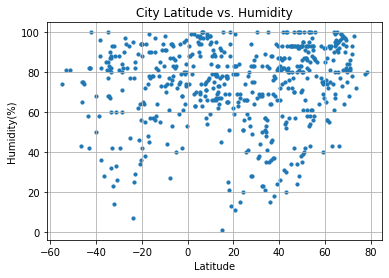

In [59]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Humidity.png")

# Show plot
plt.show()

The above scatter plot does not show any kind of pattern. The data is scattered all over and there is no distinct shape.

#### Latitude vs. Cloudiness Plot

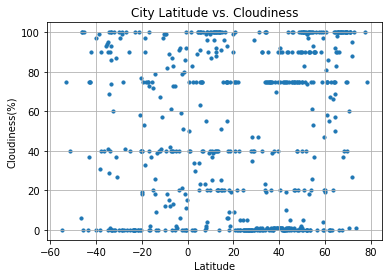

In [60]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Cloudiness.png")

# Show plot
plt.show()

This scatter plot also looks very scattered without any visible trend or shape of the dataset.

#### Latitude vs. Wind Speed Plot

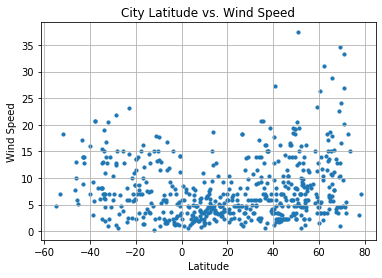

In [61]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Windspeed.png")

# Show plot
plt.show()

The above scatter plot shows the data mainly gathered at the bottom, but with no specific movement or direction.

## Linear Regression

In [62]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = weather_data.loc[weather_data["Lat"] >= 0, :]
northern_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Marsala,40,IT,1570334092,78,37.80,12.44,71.60,14.99
2,Takefu,75,JP,1570334094,64,35.90,136.17,69.80,12.75
3,Abu Zabad,100,SD,1570334096,79,12.35,29.25,73.01,7.96
4,Vestmannaeyjar,66,IS,1570334097,86,63.44,-20.27,50.10,18.34
5,Saint-Augustin,75,CA,1570334099,93,45.63,-73.98,46.99,2.24


In [63]:
# Create Northern and Southern Hemisphere DataFrames
southern_hem = weather_data.loc[weather_data["Lat"] < 0, :]
southern_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Hobart,75,AU,1570333914,82,-42.88,147.33,62.01,13.87
7,Kaitangata,100,NZ,1570334101,65,-46.28,169.85,53.01,13.00
8,Christchurch,0,NZ,1570334102,58,-43.53,172.64,55.00,17.22
9,Mataura,100,NZ,1570334104,75,-46.19,168.86,53.01,10.00
11,Port Alfred,0,ZA,1570334106,88,-33.59,26.89,64.99,11.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.88
The r-squared is: -0.8791559575810806


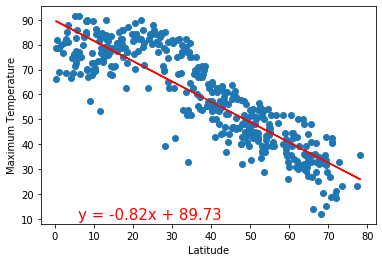

In [64]:
# Let's see if there is a correlation between Maximum temperature and latitude. 
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue}")
plt.savefig('maxtemp_lat_corr.png')
plt.show()

The above graph shows a strong negative correlation between latitude and maximum temperature in the Northern empisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.61
The r-squared is: 0.6133484077053029


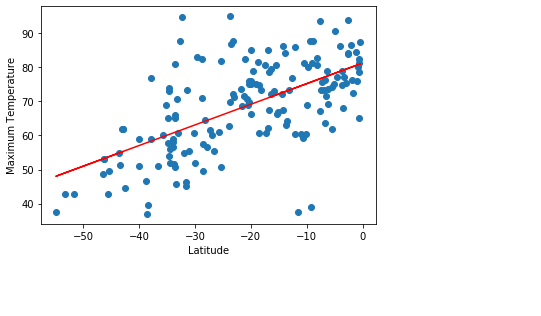

In [65]:
# Let's see if there is a correlation between Maximum temperature and latitude. 
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue}")
plt.savefig('south_maxtemp_lat_corr.png')
plt.show()

However, in the Southern emisphere there is a moderate positive correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1
The r-squared is: 0.10343221493862405


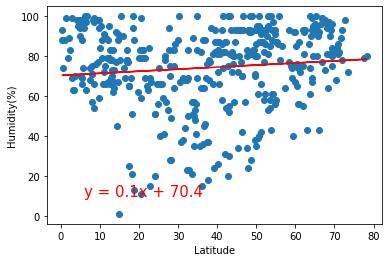

In [66]:
# Let's see if there is a correlation between Humidity and latitude. 
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('hum_lat_corr.png')
plt.show()

In the Northern emisphere there is a very weak, almost none, positive correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.09
The r-squared is: 0.08802174801606763


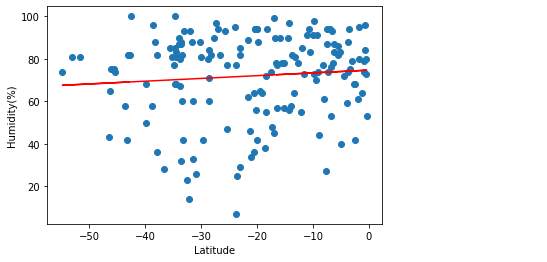

In [67]:
# Let's see if there is a correlation between Humidity and latitude. 
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('south_humidity_lat_corr.png')
plt.show()

Similar to the Northern emisphere, the Southern emisphere also shows a very weak, almost none, positive correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14
The r-squared is: 0.13538266940314084


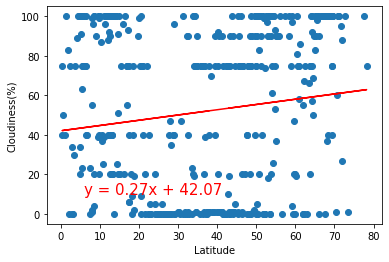

In [68]:
# Let's see if there is a correlation between Cloudiness and latitude. 
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('cloudiness_lat_corr.png')
plt.show()

In the Northern emisphere there is a weak positive correlation between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.11
The r-squared is: -0.10975336382650146


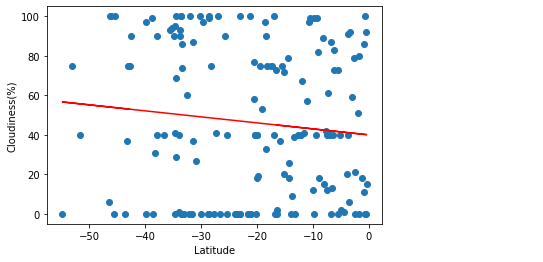

In [69]:
# Let's see if there is a correlation between Cloudiness and latitude. 
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('south_cloudiness_lat_corr.png')
plt.show()

In the Southern emisphere the correlation between latitude and cloudiness is still weak but negative.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.37
The r-squared is: 0.36629350875973216


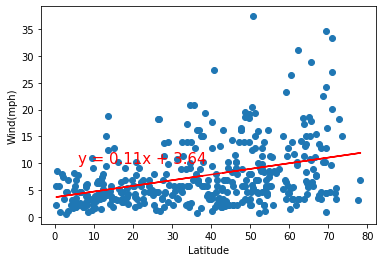

In [70]:
# Let's see if there is a correlation between Wind speed and latitude. 
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind(mph)')
print(f"The r-squared is: {rvalue}")
plt.savefig('windspeed_lat_corr.png')
plt.show()

In the Northern emisphere there is a weak positive correlation between latitude and wind speed(mph).

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.27
The r-squared is: -0.2703094188233003


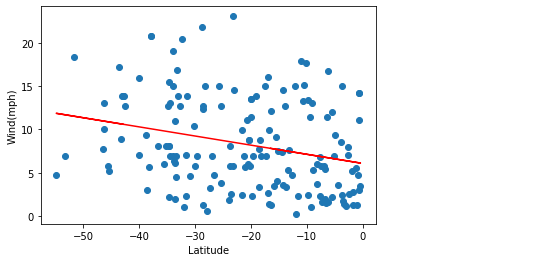

In [71]:
# Let's see if there is a correlation between Wind speed and latitude. 
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind(mph)')
print(f"The r-squared is: {rvalue}")
plt.savefig('south_windspeed_lat_corr.png')
plt.show()

In the Southern emisphere, the correlation is still weak but negative.